# start tensorboard

In [8]:
!tensorboard --logdir=./logs/train_log

# keras classifier

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing t

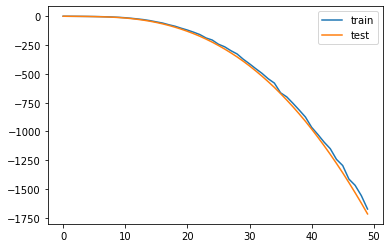

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [8]:
from matplotlib import pyplot
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import adam_v2
from keras.utils import np_utils
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
 
'''
keras实现神经网络分类模型
'''
# 读取数据
path = 'data/init/4CRE-V1.npy'
values = np.load(path)
 
y = values[:, -2]
X = values[:, :-2]
# 必须标准化，否则难以收敛
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
 
# 随机拆分训练集与测试集
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y)

# 多分类转换label
nb_classes = 4
train_Y = np_utils.to_categorical(train_y, nb_classes)
test_Y = np_utils.to_categorical(test_y, nb_classes)

# 全连接神经网络
model = Sequential()
inputs = X.shape[1]
# 隐藏层128
model.add(Dense(16, input_shape=(inputs,)))
model.add(Activation('relu'))
# Dropout层用于防止过拟合
model.add(Dropout(0.2))
# 隐藏层128
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dropout(0.2))
# 没有激活函数用于输出层，二分类问题，用sigmoid激活函数进行变换，多分类用softmax。
model.add(Dense(1))
model.add(Activation('softmax'))
# 使用高效的 ADAM 优化算法以，二分类损失函数binary_crossentropy，多分类的损失函数categorical_crossentropy
model.compile(loss='binary_crossentropy', optimizer=adam_v2.Adam(), metrics=['accuracy'])
# early stoppping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_acc', patience=50, verbose=2)
# 训练
history = model.fit(train_X, train_y, epochs=50, batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=False, callbacks=[early_stopping])# loss曲线
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# 预测
y_pre = model.predict_classes(test_X)
# 
print(classification_report(test_y, y_pre,labels=[0,1]))
print(confusion_matrix(test_y, y_pre))